In [51]:
# Загружаем библиотеки
import pandas as pd # Датафреймы pandas
from sklearn.linear_model import LinearRegression # Линейная регрессия
from sklearn.model_selection import train_test_split # Разделение выборки на обучающую и тестовую
from sklearn.tree import DecisionTreeRegressor # Решающее дерево для регрессии
import matplotlib.pyplot as plt # Графики

#### Подготовка данных

In [31]:
# Загружаем пример данных о продажах недвижимости
from sklearn.datasets import load_boston
data = pd.read_csv(load_boston()['filename'], skiprows = 1)
# Матрица признаков 
X = data.iloc [:, :-1]
# Вектор целевых значений
y = data.iloc [:, -1]
# Разделение выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)  

#### Линейная регрессия

In [45]:
# Вызываем модель линейной регрессии
model_lin = LinearRegression()
# Обучаем модель на обучающей выборке
model_lin.fit(X_train, y_train)
# Оцениваем качество с помощью коэффициента детерминации
R2_lin_reg = model_lin.score(X_test, y_test)
print(f'Точность линейной регрессии {round(R2_lin_reg, 2)}')

Точность линейной регрессии 0.68


#### Решающее дерево для регрессии

In [63]:
# Словарь для записи результатов настройки модели
result_model_tree = {}

# Перебираем в цикле ограничения на глубину дерева
for depth in range(1, 16):
    # Вызываем модель решающего дерева
    model_tree = DecisionTreeRegressor(max_depth = depth)
    # Обучаем модель на обучающей выборке
    model_tree.fit(X_train, y_train)
    # Оцениваем качество с помощью коэффициента детерминации
    R2_tree_reg = model_tree.score(X_test, y_test)
    result_model_tree[depth] = R2_tree_reg

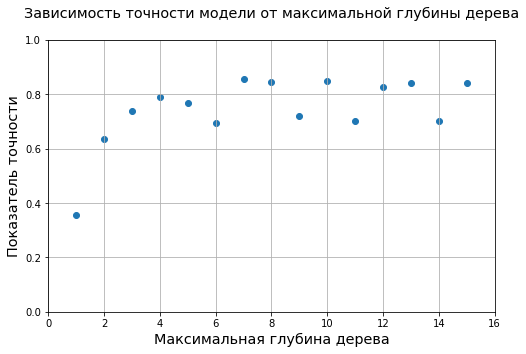

Точность модели решающего дерева возрастает с увеличением максимальной глубины вплоть до 7, с дальнейшим увеличением глубины наблюдается насыщение. Достигнутый показатель точности около 0.8


In [67]:
# Покажем на графике зависимость точности модели от максимальной глубины дерева

plt.figure(figsize = (8, 5))
plt.scatter(result_model_tree.keys(), result_model_tree.values())
plt.xlim(0, 16)
plt.ylim(0, 1)
plt.grid()
plt.xlabel('Максимальная глубина дерева', fontsize = 'x-large')
plt.ylabel('Показатель точности', fontsize = 'x-large')
plt.title('Зависимость точности модели от максимальной глубины дерева\n', fontsize = 'x-large')

plt.show()

print('Точность модели решающего дерева возрастает с увеличением максимальной глубины вплоть до 7, с дальнейшим увеличением глубины наблюдается насыщение. Достигнутый показатель точности около 0.8')

#### Вывод: в заданном примере модель решающего дерева обеспечивает лучшую точность по сравнению с моделью линейной регрессии.